# Calcul du tenseur d'Eshelby dans le cas des ellipses

## 0 Quelques fonctions utiles

In [1]:
import numpy as np
from numpy import pi
from numpy.random import random_sample
from numpy.linalg import inv
from numpy import dot
from scipy.spatial.transform import Rotation as R 
from classes import *

def Comp3333_to_66 (G) : 
    "Passe d'un tenseur de comportement  G 3x3x3x3 a une matrice de comportement F 6x6"
    F=np.zeros((6,6))
    for i in range(3):
        for j in range(3):
            F[i,j] = G[i,i,j,j]
            
        F[i,5]=(G[i,i,0,1]+G[i,i,1,0])/2.
        F[i,3]=(G[i,i,1,2]+G[i,i,2,1])/2. 
        F[i,4]=(G[i,i,2,0]+G[i,i,0,2])/2. 
        F[3,i]=(G[1,2,i,i]+G[2,1,i,i])/2. 
        F[4,i]=(G[0,2,i,i]+G[2,0,i,i])/2.
        F[5,i]=(G[0,1,i,i]+G[1,0,i,i])/2.

    F[4,4]=(G[0,2,0,2]+G[2,0,0,2]+G[0,2,2,0]+G[2,0,2,0])/4. 
    F[3,3]=(G[1,2,1,2]+G[2,1,1,2]+G[1,2,2,1]+G[2,1,2,1])/4.  
    F[5,5]=(G[0,1,0,1]+G[1,0,0,1]+G[0,1,1,0]+G[1,0,1,0])/4.  
    F[4,3]=(G[0,2,1,2]+G[2,0,1,2]+G[0,2,2,1]+G[2,0,2,1])/4.  
    F[4,5]=(G[0,2,1,0]+G[2,0,1,0]+G[0,2,0,1]+G[2,0,0,1])/4.  
    F[3,4]=(G[1,2,0,2]+G[2,1,0,2]+G[1,2,2,0]+G[2,1,2,0])/4.  
    F[5,4]=(G[0,1,0,2]+G[1,0,0,2]+G[0,1,2,0]+G[1,0,2,0])/4.  
    F[3,5]=(G[1,2,1,0]+G[2,1,1,0]+G[1,2,0,1]+G[2,1,0,1])/4.   
    F[5,3]=(G[0,1,1,2]+G[1,0,1,2]+G[0,1,2,1]+G[1,0,2,1])/4. 
    
    return F

def Comp66_to_3333(F) : 
    'Passe d une matrice F 6x6 à un tenseur G 3x3x3x3'
    G = np.zeros((3,3,3,3))
    for i in range(3) :
        for j in range(3) :
            G[i,i,j,j]=F[i,j]
       
        G[i,i,0,1]=F[i,5]
        G[i,i,1,2]=F[i,3]
        G[i,i,2,0]=F[i,4]
        G[0,2,i,i]=F[4,i]
        G[1,2,i,i]=F[3,i]
        G[0,1,i,i]=F[5,i]
        G[i,i,1,0]=F[i,5]
        G[i,i,2,1]=F[i,3]
        G[i,i,0,2]=F[i,4]
        G[2,0,i,i]=F[4,i]
        G[2,1,i,i]=F[3,i]
        G[1,0,i,i]=F[5,i]
        
    G[0,1,0,1]=F[5,5]
    G[0,1,0,2]=F[5,4]
    G[0,1,1,0]=F[5,5]
    G[0,1,1,2]=F[5,3] 
    G[0,1,2,0]=F[5,4]
    G[0,1,2,1]=F[5,3]

    G[0,2,0,1]=F[4,5]
    G[0,2,0,2]=F[4,4]
    G[0,2,1,0]=F[4,5]
    G[0,2,1,2]=F[4,3] 
    G[0,2,2,0]=F[4,4]
    G[0,2,2,1]=F[4,3]

    G[1,0,0,1]=F[5,5]
    G[1,0,0,2]=F[5,4]
    G[1,0,1,0]=F[5,5]
    G[1,0,1,2]=F[5,3] 
    G[1,0,2,0]=F[5,4]
    G[1,0,2,1]=F[5,3]

    G[1,2,0,2]=F[3,4]
    G[1,2,1,0]=F[3,5]
    G[1,2,1,2]=F[3,3] 
    G[1,2,2,0]=F[3,4]
    G[1,2,2,1]=F[3,3]

    G[2,0,0,1]=F[4,5]
    G[2,0,0,2]=F[4,4]
    G[2,0,1,0]=F[4,5]
    G[2,0,1,2]=F[4,3] 
    G[2,0,2,0]=F[4,4]
    G[2,0,2,1]=F[4,3]

    G[2,1,0,1]=F[3,5]
    G[2,1,0,2]=F[3,4]
    G[2,1,1,0]=F[3,5]
    G[2,1,1,2]=F[3,3] 
    G[2,1,2,0]=F[3,4]
    G[2,1,2,1]=F[3,3]
 
    return G 

def Rotation_angles():
    theta = 2*pi*np.random.random()
    psi = 2*pi*np.random.random()
    phi = np.arccos(np.random.random())
    return (phi,theta,psi)


def Matrice_rotation(psi,phi,theta) : 
    'Crée une matrice de rotation 3x3 à partir des trois angles d euler'
    Q = np.zeros((3,3))
    
    Q[0,0]=cos(psi)*cos(theta)-cos(phi)*sin(theta)*sin(psi)
    Q[0,1]=sin(theta)*cos(psi)+cos(phi)*sin(psi)*cos(theta)
    Q[0,2]=sin(phi)*sin(psi)
    Q[1,0]=-sin(psi)*cos(theta)-sin(theta)*cos(phi)*cos(psi)
    Q[1,1]=cos(psi)*cos(phi)*cos(theta)-sin(theta)*sin(psi)
    Q[1,2]=cos(psi)*sin(phi)
    Q[2,0]=sin(phi)*sin(theta)
    Q[2,1]=-sin(phi)*cos(theta)
    Q[2,2]=cos(phi)
    
    for i in range(3) : 
        for j in range(3):
            if (abs(Q[i,j]) < 10**-6 ) :
                Q[i,j] = 0
            
    return Q

def Matrices_rotation(n) : 
    'Crée une matrice de rotation 3x3 à partir des trois angles d euler'
    Q = np.zeros((n,3,3))
    for i in range(n) : 
        theta,phi,psi = Rot.random().as_euler('zxy', degrees=False)
        Q[i,0,0]=cos(psi)*cos(theta)-cos(phi)*sin(theta)*sin(psi)
        Q[i,0,1]=sin(theta)*cos(psi)+cos(phi)*sin(psi)*cos(theta)
        Q[i,0,2]=sin(phi)*sin(psi)
        Q[i,1,0]=-sin(psi)*cos(theta)-sin(theta)*cos(phi)*cos(psi)
        Q[i,1,1]=cos(psi)*cos(phi)*cos(theta)-sin(theta)*sin(psi)
        Q[i,1,2]=cos(psi)*sin(phi)
        Q[i,2,0]=sin(phi)*sin(theta)
        Q[i,2,1]=-sin(phi)*cos(theta)
        Q[i,2,2]=cos(phi)
    
        for j in range(3) : 
            for k in range(3):
                if (abs(Q[i,j,k]) < 10**-6 ) :
                    Q[i,j,k] = 0
            
    return Q

def Rotation_operator(n_renforts) : 
    B = np.zeros((n_renforts,3,3,3,3,3,3,3,3))
    R = np.zeros((n_renforts,3,3))
    for z in range(n_renforts) :
        theta,phi,psi = Rot.random().as_euler('zxy', degrees=False)
        R[z,0,0]=cos(psi)*cos(theta)-cos(phi)*sin(theta)*sin(psi)
        R[z,0,1]=sin(theta)*cos(psi)+cos(phi)*sin(psi)*cos(theta)
        R[z,0,2]=sin(phi)*sin(psi)
        R[z,1,0]=-sin(psi)*cos(theta)-sin(theta)*cos(phi)*cos(psi)
        R[z,1,1]=cos(psi)*cos(phi)*cos(theta)-sin(theta)*sin(psi)
        R[z,1,2]=cos(psi)*sin(phi)
        R[z,2,0]=sin(phi)*sin(theta)
        R[z,2,1]=-sin(phi)*cos(theta)
        R[z,2,2]=cos(phi)
        for  i in range(3) : 
            for  j in range(i+1):
                for  k in range(3):
                    for  l in range(k+1):
                        for  m in range(3):
                            for  n in range(3):
                                for  ll in range(3):
                                    for  kk in range(3):
                                        B[z,i,j,k,l,m,n,ll,kk] = R[z,i,m]*R[z,j,n]*R[z,k,ll]*R[z,l,kk]
    return B

def Rotation_tenseur(S,R,z) : 
    ' Renvoie la rotation du tenseur S par les 3 angles d Euler'
    B = np.zeros((3,3,3,3))
    for  i in range(3) : 
        for  j in range(i+1):
            for  k in range(3):
                for  l in range(k+1):
                    for  m in range(3):
                        for  n in range(3):
                            for  ll in range(3):
                                for  kk in range(3):
                                    B[i,j,k,l] += R[z,i,m]*R[z,j,n]*R[z,k,ll]*R[z,l,kk]*S[m,n,ll,kk]
                                    B[i,j,l,k] = B[i,j,k,l]
                                    B[j,i,k,l] = B[i,j,k,l]
                                    B[j,i,l,k] = B[i,j,k,l]
    return B

def Rotation_tenseur2(S,Operator,z) : 
    ' Renvoie la rotation du tenseur S par les 3 angles d Euler'
    B = np.zeros((3,3,3,3))
    for  i in range(3) : 
        for  j in range(i+1):
            for  k in range(3):
                for  l in range(k+1):
                    for  m in range(3):
                        for  n in range(3):
                            for  ll in range(3):
                                for  kk in range(3):
                                    B[i,j,k,l] += Operator[z,i,j,k,l,m,n,ll,kk]*S[m,n,ll,kk]
                                    B[i,j,l,k] = B[i,j,k,l]
                                    B[j,i,k,l] = B[i,j,k,l]
                                    B[j,i,l,k] = B[i,j,k,l]
    return B


def Matrice_Souplesse_Isotrope(E,nu) :
    'Renvoie la matrice de souplesse d un matériau isotrope'
    S = np.zeros((6,6))
    S[0,0]=1./E
    S[1,1]=1./E
    S[2,2]=1./E

    S[3,3]=2.*(1+nu)/E
    S[4,4]=2.*(1+nu)/E
    S[5,5]=2.*(1+nu)/E

    S[0,1]=-nu/E
    S[0,2]=-nu/E
    S[1,2]=-nu/E
    S[1,0]=-nu/E
    S[2,1]=-nu/E
    S[2,0]=-nu/E
    
    return S
    

def Young_isotrope(S) : 
    return 3/(S[0,0]+S[1,1]+S[2,2])

def nu_isotrope(S) : 
    Ey = 1/S[1,1]
    Ez = 1/S[2,2]
    return - 1/3 * (Ey*S[0,1] + Ez*S[0,2] + Ez*S[1,2])
    
def Young_anisotrope(C) : 
    return C[0,0],C[1,1],C[2,2]


def Compute_with_permutation(a,I,II,nu) : 
    S = np.zeros((3,3,3,3))
    
    for i in range(3) :
        S[i,i,i,i] = 3*a[i]**2*II[i][i] / (8*pi*(1-nu)) + I[i] * (1-2*nu)/(8*pi*(1-nu))
        j = (i+1)%3
        S[i,i,j,j] = a[j]**2*II[i][j]/(8*pi*(1-nu)) -  I[i] * (1-2*nu)/(8*pi*(1-nu))
        S[i,j,i,j] = (a[i]**2+a[j]**2)*II[i][j]/(16*pi*(1-nu)) + (1-2*nu)/(16*pi*(1-nu))*(I[i]+I[j])
        k = (i+2)%3
        S[i,i,k,k] = a[k]**2*II[i][k]/(8*pi*(1-nu)) -  I[i] * (1-2*nu)/(8*pi*(1-nu))
        S[i,k,i,k] = (a[i]**2+a[k]**2)*II[i][k]/(16*pi*(1-nu)) + (1-2*nu)/(16*pi*(1-nu))*(I[i]+I[k])
        
    return S

def Cyclic_permutation(S) : 
    for i in range(3) : 
        for j in range(3) :
            for k in range(3) : 
                for l in range(3) : 
                    val = non_zeros(S,i,j,k,l)
                    S[i,j,k,l] = val
                    S[i,j,l,k] = val
                    S[j,i,k,l] = val
                    S[j,i,l,k] = val
    return S
                    

def non_zeros(S,i,j,k,l) : 
    if S[i,j,k,l] != 0 : 
        return S[i,j,k,l]
    if S[i,j,l,k] != 0 : 
        return S[i,j,l,k]
    if S[j,i,k,l] != 0 : 
        return S[j,i,k,l]
    if S[j,i,l,k] != 0 : 
        return S[j,i,l,k]
    return 0

def clear_matrix3 (C,k) : 
    n = C.shape[0]
    for i in range(n) : 
        for j in range(n) :
            if C[i,j,k]<10**-8 : 
                C[i,j,k] = 0
                
def clear_matrix2 (C) : 
    n = C.shape[0]
    for i in range(n) : 
        for j in range(n) :
            if C[i,j]<10**-8 : 
                C[i,j] = 0
    

# Calcul du tenseur d'Eshelby dans le cas général

In [2]:
from numpy.linalg import det
def Eshelby_tensor(Axis,Em,nu) : 
    
    Sm = Matrice_Souplesse_Isotrope(Em,nu)
    Cm = inv(Sm)
    Cm3 = Comp66_to_3333(Cm)
    a0,a1,a2 = Axis
    IJV = np.array([[0,0],[1,1],[2,2],[1,2],[0,2],[0,1]])
    Nit = 40
    Ntop = Nit
    Mtop = Nit
    dphi = pi/(Ntop-1)
    dtheta = pi/(Ntop-1)
    A = np.zeros((6,6))
    B = np.zeros((6,6,Mtop))
    G = np.zeros((6,6,Ntop))
    E = np.zeros((6,6))
    
    # Integration de la fonction de green sur la demi ellipsoïde
    for m in range(Mtop) : 
        phi = m*dphi
        for n in range(Ntop) : 
            theta = n*dtheta
            X = np.array([sin(theta)*cos(phi)/a0 , sin(theta)*sin(phi)/a1 , cos(theta)/a2])
            CXX = np.zeros((3,3))
            for i in range(3) :
                for j in range(3) :
                    for k in range(3) : 
                        for l in range(3) :
                            CXX[i,k] += Cm3[i,j,k,l]*X[j]*X[l]
            CXX = inv(CXX)
            for i in range(6) :
                for j in range(6) :                     
                    I1 = IJV[i,0]
                    J1 = IJV[j,0]
                    I2 = IJV[i,1]
                    J2 = IJV[j,1]
                    G[i,j,n] = 0.5 * sin(theta) * (CXX[I1,J1]*X[I2]*X[J2] + CXX[I2,J1]*X[I1]*X[J2] + CXX[I1,J2]*X[I2]*X[J1] + CXX[I2,J2]*X[I1]*X[J1])
        
        
        B[:,:,m] = 0.5 * dtheta * (G[:,:,0]+G[:,:,Ntop-1])
        for i in range(1,Ntop-1) : 
            B[:,:,m] +=  dtheta * G[:,:,i]

    A = 0.5*(B[:,:,0]+B[:,:,Ntop-1])* dphi/(4*pi)
    for i in range(1,Ntop-1) : 
         A += B[:,:,i]* dphi/(4*pi)  
    
    for i in range(6) : 
        for j in range(6) : 
            E[i,j]=A[i,0]*Cm[0,j]+A[i,1]*Cm[1,j]+A[i,2]*Cm[2,j] + 4* (A[i,3]*Cm[3,j]+A[i,4]*Cm[4,j]+A[i,5]*Cm[5,j]) 
    
    return E

def f(Cm3,X,i,j) : 
    "CXXij = Somme sur k et l de Cm3[i,k,j,l]*X[k]*X[l]"
    #inversion de la transposée
    i1 = (i+1)%3
    i2 = (i+2)%3
    j1 = (j+1)%3
    j2 = (j+2)%3
    a,b,c,d = 0,0,0,0
    for k  in range(3) : 
        for l in range(3) : 
            a += Cm3[j2,k,i2,l]*X[k]*X[l]
            b += Cm3[j1,k,i1,l]*X[k]*X[l]
            c += Cm3[j2,k,i1,l]*X[k]*X[l]
            d += Cm3[j1,k,i2,l]*X[k]*X[l]
    return  a*b - c*d

def deter(Cm3,X) : 
    #calcul du determinant de la matrice CXXij = Somme sur k et l de Cm3[i,k,j,l]*X[j]*X[l]
    det = 0
    for z in range(3) : 
        a1,a2,a3,b1,b2,b3 = 0,0,0,0,0,0
        for k  in range(3) : 
            for l in range(3) : 

                a1 += Cm3[0,k,z,l]*X[k]*X[l]
                a2 += Cm3[1,k,(z+1)%3,l]*X[k]*X[l]
                a3 += Cm3[2,k,(z+2)%3,l]*X[k]*X[l]

                b1 += Cm3[0,k,(z+2)%3,l]*X[k]*X[l]
                b2 += Cm3[1,k,(z+1)%3,l]*X[k]*X[l]
                b3 += Cm3[2,k,z,l]*X[k]*X[l]

        det+= a1*a2*a3 - b1*b2*b3
    return det

def Eshelby_tensor2(Axis,Em,nu) : 
    
    Sm = Matrice_Souplesse_Isotrope(Em,nu)
    Cm = inv(Sm)
    Cm3 = Comp66_to_3333(Cm)
    a0,a1,a2 = Axis
    IJV = np.array([[0,0],[1,1],[2,2],[1,2],[0,2],[0,1]])
    Nit = 40
    Ntop = Nit
    Mtop = Nit
    dphi = pi/(Ntop-1)
    dtheta = pi/(Ntop-1)
    A = np.zeros((6,6))
    B = np.zeros((6,6,Mtop))
    G = np.zeros((6,6,Ntop))
    E = np.zeros((6,6))
    
    
    # Integration de la fonction de green sur la demi ellipsoïde
    for m in range(Mtop) : 
        phi = m*dphi
        for n in range(Ntop) : 
            theta = n*dtheta
            X = np.array([sin(theta)*cos(phi)/a0 , sin(theta)*sin(phi)/a1 , cos(theta)/a2])
            CXX = np.zeros((3,3))
            CYY = np.zeros((3,3))
            for i in range(3) :
                for j in range(3) :
                    CYY[i,j] = f(Cm3,X,i,j)
                    for k in range(3) : 
                        for l in range(3) :
                            CXX[i,k] += Cm3[i,j,k,l]*X[j]*X[l]
            CYY = CYY/det(CXX)
            CXX = CYY

            for i in range(6) :
                for j in range(6) :                     
                    I1 = IJV[i,0]
                    J1 = IJV[j,0]
                    I2 = IJV[i,1]
                    J2 = IJV[j,1]
                    G[i,j,n] = 0.5 * sin(theta) * (CXX[I1,J1]*X[I2]*X[J2] + CXX[I2,J1]*X[I1]*X[J2] + CXX[I1,J2]*X[I2]*X[J1] + CXX[I2,J2]*X[I1]*X[J1])
        
        
        B[:,:,m] = 0.5 * dtheta * (G[:,:,0]+G[:,:,Ntop-1])
        for i in range(1,Ntop-1) : 
            B[:,:,m] +=  dtheta * G[:,:,i]

    A = 0.5*(B[:,:,0]+B[:,:,Ntop-1])* dphi/(4*pi)
    for i in range(1,Ntop-1) : 
         A += B[:,:,i]* dphi/(4*pi)  
    
    for i in range(6) : 
        for j in range(6) : 
            E[i,j]=A[i,0]*Cm[0,j]+A[i,1]*Cm[1,j]+A[i,2]*Cm[2,j] + 4* (A[i,3]*Cm[3,j]+A[i,4]*Cm[4,j]+A[i,5]*Cm[5,j]) 
    
    return E



In [3]:
def main():
    E = Eshelby_tensor2((1,1,1),1,0)
    clear_matrix2(E)
    print(E)
     
import cProfile
import re
cProfile.run('main()')

[[0.46666702 0.         0.         0.         0.         0.        ]
 [0.         0.46666702 0.         0.         0.         0.        ]
 [0.         0.         0.46612587 0.         0.         0.        ]
 [0.         0.         0.         0.53279201 0.         0.        ]
 [0.         0.         0.         0.         0.53279201 0.        ]
 [0.         0.         0.         0.         0.         0.53333369]]
         112806 function calls (112764 primitive calls) in 2.387 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(amax)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(amin)
     1600    0.002    0.000    0.052    0.000 <__array_function__ internals>:2(det)
        1    0.000    0.000    0.004    0.004 <__array_function__ internals>:2(inv)
        1    0.000    0.000    0.000    0.000 <ipython-input-1-8f658f57

## MODELE AUTOCOHERENT UNE FORME D'INCLUSION

In [4]:
from scipy.spatial.transform import Rotation as Rot
import time as tm
        
def compute_h_behavior(A,f):
    
    n_renforts = 500     # paramètre non physique qui permet de forcer lisotropie
    n_pas = 10            # pas du modèle autocohérent
    precision = 10**-2  # précision désirée dans l'algorithme du point fixe
    

    # Création des matrices de comportement
    Em = 1
    num = 0.3
    Ef = 100
    nuf = 0.3
    
    Sm = Matrice_Souplesse_Isotrope(Em,num)
    Cm = inv(Sm)
    Sf = Matrice_Souplesse_Isotrope(Ef,nuf)
    Cf = inv(Sf)    
    Id = np.identity(6)
    
    #Création des matrices de rotations
    MRot = Matrices_rotation(n_renforts)
    
    # Création des liste de résultat
    listF,listE,listNu = [],[],[]
    
    #Initialisation du point fixe
    Cp = Cm
    Sp = Sm
    
    # Boucle d'incrémentation de la fraction volumique
    for i in range(n_pas+1) :
        t_pas = tm.time()
        f_pas = f*i/n_pas
        f_1_renfort = f_pas/n_renforts
        
        # Algorithme du point fixe : Ch=f(Ch) pour f fixé
        
        convergence = 2
        
        Eh = Young_isotrope(Sp)
        nuh = nu_isotrope(Sp)
        print("******************")
        print('f_pas : ',f_pas)
        #print('        convergence',convergence)
        while convergence>precision :   
            t_point_fixe = tm.time()
            W = np.zeros((6,6)) # Matrice des contributions de l'inclusion dans Ch
            Esh = Eshelby_tensor(A,Eh,nuh)
            Aesh = inv(Id + np.matmul(Esh,np.matmul(Sp,Cf-Cp)))
            V6 = np.dot(Cf-Cm,Aesh)
            V3 = Comp66_to_3333(V6)
            print("t_esh : ",tm.time()-t_point_fixe)
            # Ajout des contribution de chaque renfort en fonction de son orientation
            t_renfort = tm.time()
            for i in range(n_renforts) : 
                #theta,phi,psi = Rot.random().as_euler('zxy', degrees=False)
                V3R = Rotation_tenseur(V3,MRot,i)
                V = Comp3333_to_66(V3R)
                W += f_1_renfort * V
            print('t_renfort : ', tm.time()-t_renfort)

            Ch = Cm + W
            # Actualisation du matériau homogénéisé
            Cp = Ch
            Sp = inv(Cp)
            
            # Test de sortie
            E = Young_isotrope(Sp)
            nu = nu_isotrope(Sp)
            convergence = abs(E-Eh)/Eh + abs(nu-nuh)/nuh
            #print('        convergence',convergence)
            Eh = E
            nuh = nu           
            
            # Forçage de la matrice en matrice isotrope
            Sp = Matrice_Souplesse_Isotrope(Eh,nuh)
            Cp = inv(Sp)
            print("temps du point fixe : ",tm.time()-t_point_fixe)
        print('Eh = ',Eh)
        print('nuh = ',nuh)
        listF.append(f_pas)
        listE.append(Eh)
        listNu.append(nuh)
        print("Temps du pas : ",tm.time()-t_pas)
    print("Ch")
    print(Cp)
    return listF,listE,listNu

def compute_h_behavior2(A,f):
    
    n_renforts = 500     # paramètre non physique qui permet de forcer lisotropie
    n_pas = 5            # pas du modèle autocohérent
    precision = 10**-2  # précision désirée dans l'algorithme du point fixe
    

    # Création des matrices de comportement
    Em = 1
    num = 0.3
    Ef = 100
    nuf = 0.3
    
    Sm = Matrice_Souplesse_Isotrope(Em,num)
    Cm = inv(Sm)
    Sf = Matrice_Souplesse_Isotrope(Ef,nuf)
    Cf = inv(Sf)    
    Id = np.identity(6)
    
    #Création des matrices de rotations
    Rotation_Op = Rotation_operator(n_renforts)
    
    # Création des liste de résultat
    listF,listE,listNu = [],[],[]
    
    #Initialisation du point fixe
    Cp = Cm
    Sp = Sm
    
    # Boucle d'incrémentation de la fraction volumique
    for i in range(n_pas+1) :
        t_pas = tm.time()
        f_pas = f*i/n_pas
        f_1_renfort = f_pas/n_renforts
        
        # Algorithme du point fixe : Ch=f(Ch) pour f fixé
        
        convergence = 2
        
        Eh = Young_isotrope(Sp)
        nuh = nu_isotrope(Sp)
        print("******************")
        print('f_pas : ',f_pas)
        #print('        convergence',convergence)
        while convergence>precision :   
            t_point_fixe = tm.time()
            W = np.zeros((6,6)) # Matrice des contributions de l'inclusion dans Ch
            Esh = Eshelby_tensor(A,Eh,nuh)
            Aesh = inv(Id + np.matmul(Esh,np.matmul(Sp,Cf-Cp)))
            V6 = np.dot(Cf-Cm,Aesh)
            V3 = Comp66_to_3333(V6)
            print("t_esh : ",tm.time()-t_point_fixe)
            # Ajout des contribution de chaque renfort en fonction de son orientation
            t_renfort = tm.time()
            for i in range(n_renforts) : 
                #theta,phi,psi = Rot.random().as_euler('zxy', degrees=False)
                V3R = Rotation_tenseur2(V3,Rotation_Op,i)
                V = Comp3333_to_66(V3R)
                W += f_1_renfort * V
            print('t_renfort : ', tm.time()-t_renfort)
            t_inversion = tm.time()
            Ch = Cm + W
            # Actualisation du matériau homogénéisé
            Cp = Ch
            Sp = inv(Cp)
            
            # Test de sortie
            E = Young_isotrope(Sp)
            nu = nu_isotrope(Sp)
            convergence = abs(E-Eh)/Eh + abs(nu-nuh)/nuh
            #print('        convergence',convergence)
            Eh = E
            nuh = nu           
            
            # Forçage de la matrice en matrice isotrope
            Sp = Matrice_Souplesse_Isotrope(Eh,nuh)
            Cp = inv(Sp)
            print("temps de l'actualisation et des inversions : ",tm.time()-t_inversion)
            print("temps du point fixe : ",tm.time()-t_point_fixe)
        print('Eh = ',Eh)
        print('nuh = ',nuh)
        listF.append(f_pas)
        listE.append(Eh)
        listNu.append(nuh)
        print("Temps du pas : ",tm.time()-t_pas)
    print("Ch")
    print(Cp)
    return listF,listE,listNu

In [5]:
def main():
    A = (3,2,1)
    f = 0.1
    print(compute_h_behavior2(A,f))
     

import cProfile
import re
cProfile.run('main()')


******************
f_pas :  0.0
t_esh :  2.3286876678466797
t_renfort :  8.299749851226807
temps de l'actualisation et des inversions :  0.004299640655517578
temps du point fixe :  10.634929418563843
Eh =  1.0000000000000002
nuh =  0.29999999999999993
Temps du pas :  10.637350082397461
******************
f_pas :  0.02
t_esh :  2.3483500480651855
t_renfort :  8.216133117675781
temps de l'actualisation et des inversions :  0.004278421401977539
temps du point fixe :  10.57093071937561
t_esh :  2.600677251815796
t_renfort :  8.336426258087158
temps de l'actualisation et des inversions :  0.0043065547943115234
temps du point fixe :  10.94419813156128
Eh =  1.047557584864519
nuh =  0.29655551853875584
Temps du pas :  21.517836332321167
******************
f_pas :  0.04
t_esh :  2.315492630004883
t_renfort :  8.349765062332153
temps de l'actualisation et des inversions :  0.00021791458129882812
temps du point fixe :  10.667539358139038
t_esh :  2.3955559730529785
t_renfort :  8.33037519454956


## Comparaison avec les spheres isotropes

******************
f_pas :  0.0
        convergence 2
        convergence 0.0
Eh =  1.0
nuh =  -0.0
******************
f_pas :  0.01
        convergence 2
        convergence 0.021959691430479156
Eh =  1.0219596914304792
nuh =  0.003485112828821385
******************
f_pas :  0.02
        convergence 2
        convergence 0.02279644105810963
Eh =  1.0447561324885888
nuh =  0.006969788903045195
******************
f_pas :  0.030000000000000006
        convergence 2
        convergence 0.023681403706630855
Eh =  1.0684375361952196
nuh =  0.010453576276489763
******************
f_pas :  0.04
        convergence 2
        convergence 0.02461699370813708
Eh =  1.0930545299033567
nuh =  0.013936566527245219
******************
f_pas :  0.05
        convergence 2
        convergence 0.025608438262296307
Eh =  1.118662968165653
nuh =  0.017418159332077267
******************
f_pas :  0.06000000000000001
        convergence 2
        convergence 0.026660211412313783
Eh =  1.1453231795779668
nuh = 

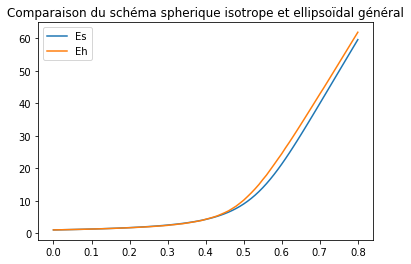

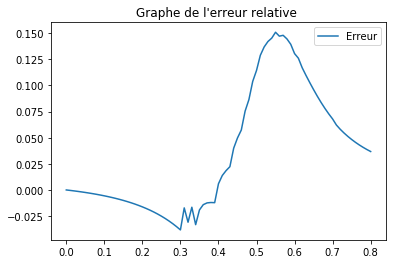

In [18]:
from classes_v2 import * 
fmax = 0.8
A = (1,1,1)
F,Eh,Nuh = compute_h_behavior(A,fmax)

Em = 1
num = 0

Ef = 100
nuf = 0

inclusion_behavior = {"E":Ef, "nu":nuf}
matrix_behavior = {"E":Em, "nu":num}   

Ecalc = []

for i in range(len(F)):
    
    f_inclusion = F[i]  
    inclusion1 = Inclusion(0,inclusion_behavior)
    microstructure1 = Microstructure(matrix_behavior,{inclusion1 : f_inclusion})
    

    Ch=Autocoherent_Hill().compute_h_behavior(microstructure1)  
    Ecalc.append(Ch['E'])
    

plt.title("Comparaison du schéma spherique isotrope et ellipsoïdal général")
plt.plot(F,Ecalc,label='Es')
plt.plot(F,Eh,label='Eh')
plt.legend()
plt.show()

Ecalc = np.array(Ecalc)
Eh = np.array(Eh)
Erreur = (Eh-Ecalc)/Eh

plt.title("Graphe de l'erreur relative ")
plt.plot(F,Erreur,label='Erreur')
plt.legend()
plt.show()



## MODELE AUTOCOHERENT PLUSIEURS FORMES D'UNE MEME INCLUSION

In [6]:
def compute_h_behavior_multi(Argument):
    
    n_renforts = 100     # paramètre non physique qui permet de forcer lisotropie
    n_pas = 2            # pas du modèle autocohérent
    precision = 10**-2  # précision désirée dans l'algorithme du point fixe
    

    # Création des matrices de comportement
    Em = 1
    num = 0
    Ef = 100
    nuf = 0
    
    Sm = Matrice_Souplesse_Isotrope(Em,num)
    Cm = inv(Sm)
    Sf = Matrice_Souplesse_Isotrope(Ef,nuf)
    Cf = inv(Sf)    
    Id = np.identity(6)
    
    #Initialisation du point fixe
    Cp = Cm
    Sp = Sm
    
    n_inclusions = len(Argument)
    A = np.zeros((n_inclusions,3))
    F = np.zeros(n_inclusions)
    for i in range(n_inclusions) : 
        A[i,:],F[i] = Argument[i]
    
    # Boucle d'incrémentation du pas
    for i in range(n_pas+1) : 
        F_pas = F*i/n_pas
        F_1_renfort = F_pas/n_renforts
        
        # Algorithme du point fixe : Ch=f(Ch) pour f fixé
        
        convergence = 2
        
        Eh = Young_isotrope(Sp)
        nuh = nu_isotrope(Sp)
        
        print('f_pas : ',F_pas)
        print('convergence',convergence)
        while convergence>precision :   
            W = np.zeros((6,6))           # Matrice des contributions de l'inclusion dans Ch
            # Boucle sur les différentes formes d'inclusions
            for j in range(n_inclusions) : 
                Esh = Eshelby_tensor(A[j],Eh,nuh)
                #print('Esh')
                #print(Esh)
                Aesh = inv(Id + np.matmul(Esh,np.matmul(Sp,Cf-Cp)))
                #print('Aesh')
                #print(Aesh)
                V6 = np.dot(Cf-Cm,Aesh)
                #print('V6')
                #print(V6)
                V3 = Comp66_to_3333(V6)
                # Ajout des contribution de chaque renfort en fonction de son orientation
                for i in range(n_renforts) : 
                    theta,phi,psi = Rot.random().as_euler('zxy', degrees=False)
                    #phi,theta,psi = Rotation_angles()
                    #phi,theta,psi = 0,0,0
                    V3R = Rotation_tenseur(V3,phi,theta,psi)
                    V = Comp3333_to_66(V3R)
                    W += F_1_renfort[j] * V
            #print('V3')
            #print(V3)
            #print('V3R')
            #print(V3R)
            #print('Rot')
            #print( Matrice_rotation(psi,phi,theta))
            #print('W')
            #print(W)
            Ch = Cm + W
            # Actualisation du matériau homogénéisé
            Cp = Ch
            Sp = inv(Cp)
            
            # Test de sortie
            E = Young_isotrope(Sp)
            nu = nu_isotrope(Sp)
            convergence = abs(E-Eh)
            #print('E', E,' nu',nu)
            #print('Eh', Eh,' nuh',nuh)
            print('convergence',convergence)
            Eh = E
            nuh = nu           
            
            # Forçage de la matrice en matrice isotrope
            Sp = Matrice_Souplesse_Isotrope(Eh,nuh)
            Cp = inv(Sp)
            
    return Cp


### TEST

In [7]:
A = (3,2,1)
f = 0.2/3
Argument = [(A,f),(A,f),(A,f)]
Ch = compute_h_behavior_multi(Argument)
print('Ch')
print(Ch)

f_pas :  [0. 0. 0.]
convergence 2
convergence 0.0
f_pas :  [0.03333333 0.03333333 0.03333333]
convergence 2
convergence 0.25320320496455695
convergence 0.05753770967945737
convergence 0.011696719720124982
convergence 0.003625280870453107
f_pas :  [0.06666667 0.06666667 0.06666667]
convergence 2
convergence 0.6570982804851093
convergence 0.12786100133259604
convergence 0.05771124285277485
convergence 0.022006576777925613
convergence 0.011842687250456452
convergence 0.004589859453542955
Ch
[[1.90686237 0.1632658  0.1632658  0.         0.         0.        ]
 [0.1632658  1.90686237 0.1632658  0.         0.         0.        ]
 [0.1632658  0.1632658  1.90686237 0.         0.         0.        ]
 [0.         0.         0.         0.87179829 0.         0.        ]
 [0.         0.         0.         0.         0.87179829 0.        ]
 [0.         0.         0.         0.         0.         0.87179829]]


### VERSION PROPRE : INCLUSIONS DE FORMES ET COMPORTEMENT DIFFERENTS

In [ ]:
from scipy.spatial.transform import Rotation as Rot

class Model:
    """
    Classe générique mère de toutes les classes modèles. 
    Contient la méthode permettant de vérifier les hypothèses du modèle sur une microstructure, ainsi que la méthode appelée lors du calcul du comportement homogénéisé.
    """
    
    def check_hypothesis(self, microstructure):
        """
        Vérifies si la microstructure vérifie les hypothèses du modèle, renvoie un booléen. 
        """
        # Récupération des inclusions de la microstructure
        dict_inclusions = microstructure.dict_inclusions
        inclusions = list(dict_inclusions.keys())
        # Initialisation du résultat
        result = True
        # Vérification du nombre d'inclusions
        if n_inclusions != self.n_inclusions:
             result = False
        # Vérification du type d'inclusion
        for inclusion in inclusions:
            if inclusion.type_inclusion != self.type_inclusion:
                result = False
        # Vérification du comportement des inclusions et de la matrice
        for element in inclusions + [microstructure]:
            if not set(element.behavior.keys()).issubset(self.behavior_condition):
                result = False
        # Renvoi du résultat
        return result
    
    def compute_h_behavior(self, microstructure):
        """
        Calcule le comportement homogénéisé de la microstructure avec le modèle.
        Vérifies que le modèle s'applique bien sur la microstructure entrée.
        Si les éléments en entrée ne sont pas visco-élastiques (i.e: si la liste frequency de la microstructure est vide), renvoie un dictionnaire de paramètres réels sous la forme {"parameter": value(float)}. Dans le cas isotrope, calcule aussi les paramètres manquants (mu et E, ou K et G).
        Sinon, réalise une boucle sur les valeurs de fréquence, puis renvoie un dictionnaire de comportement complet (avec valeurs des paramètres manquants) de la forme {"parameter": [values(complex)]}.
        """
        # Vérification des conditions d'application
        compatible = self.check_hypothesis(microstructure)
        if not compatible:
            raise NameError("The microstructure does not match the model hypothesis")
        
        frequency = microstructure.frequency
        # Cas élastique
        if not list(frequency):
            Cm = microstructure.behavior
            # Récupération du comportement des inclusions, format {Cf: fraction_volumique}
            inclusion_behaviors = [(inclusion.behavior, f) for (inclusion,f) in microstructure.dict_inclusions.items()]
            # Calcul du comportement homogénéisé
            h_behavior = self.compute_behavior(Cm, inclusion_behaviors)
            h_behavior = {parameter: value.real for (parameter,value) in h_behavior.items()} # Conversion des valeurs éventuellement complexes en valeurs réelles
            h_behavior = complete_behavior(h_behavior)
        # Cas visco-élastique
        else:
            # Initialisation du résultat
            h_behavior = {}
            # Calcul du comportement en fonction de la fréquence
            for i in range(len(frequency)):
                # Récupération du comportement de la matrice à la fréquence i
                Cm = {parameter: values[i] for (parameter,values) in microstructure.behavior.items()}
                # Récupération des comportements des inclusions à la fréquence i
                inclusion_behaviors = [] # Initialisation
                for inclusion, f in microstructure.dict_inclusions.items():
                    inclusion_behavior = {parameter: values[i] for (parameter, values) in inclusion.behavior.items()}
                    inclusion_behaviors.append((inclusion_behavior, f))
                # Calcul du comportement homogénéisé à la fréquence i
                h_behavior_i = self.compute_behavior(Cm, inclusion_behaviors)
                h_behavior_i = complete_behavior(h_behavior_i)
                # Ajout à la liste des comportements
                for parameter, value in h_behavior_i.items():
                    try:
                        h_behavior[parameter].append(value)
                    except KeyError:
                        # Création de l'entrée associée au paramètre
                        h_behavior[parameter] = [value]
        # Renvoi du résultat
        return h_behavior


class Autocoherent_Hill(Model):
    """
    Modèle autocohérent de Hill.
    """
    def __init__(self):
        """
        Définition des hypothèses du modèle.
        """
        self.type_inclusion = 10 # Ellipses dans le cas général
        self.behavior_condition = set(['K', 'G','E', 'nu'])  # Le modèle s'applique sur des microstructures dont les inclusions et la matrice sont isotropes
        self.n_renforts = 200     # paramètre non physique qui permet de forcer lisotropie
        self.n_point_fixe = 10           # pas du modèle autocohérent
        self.precision = 10**-1  # précision désirée dans l'algorithme du point fixe
        self.name = "Self-consistent"       
        
        
    def __str__(self):
        """
        Description textuelle du modèle.
        """
        return "Modèle autocohérent"
    
    def __repr__(self):
        """
        Description textuelle du modèle.
        """
        return str(self)
    
        
    def compute_h_behavior(self,Cm,inclusion_fraction,inclusion_behavior,inclusion_shape):

        n_inclusion = inclusion_fraction.shape[0] # les 3 arguments sont des arrays
        Sm = inv(Cm)
        Id = np.identity(6)

        #Initialisation du point fixe
        Cp = Cm
        Sp = Sm

        # Boucle d'incrémentation de la fraction volumique
        for i in range(n_pas+1) : 
            F_pas = inclusion_fraction*i/self.n_point_fixe
            F_1_renfort = F_pas/self.n_renforts

            # Algorithme du point fixe : Ch=f(Ch) pour f fixé

            convergence = 2

            Eh = Young_isotrope(Sp)
            nuh = nu_isotrope(Sp)

            print('f_pas : ',F_pas)
            print('convergence',convergence)
            while convergence>precision :   
                W = np.zeros((6,6))           # Matrice des contributions de l'inclusion dans Ch
                
                # Boucle sur les différentes formes d'inclusions
                for j in range(n_inclusions) : 
                    Cf = inclusion_behavior[j]
                    A = inclusion_shape[j]
                    Esh = Eshelby_tensor(A,Eh,nuh)
                    Aesh = inv(Id + np.matmul(Esh,np.matmul(Sp,Cf-Cp)))
                    V6 = np.dot(Cf-Cm,Aesh)
                    V3 = Comp66_to_3333(V6)
                    
                    # Ajout des contribution de chaque renfort en fonction de son orientation
                    for i in range(n_renforts) : 
                        theta,phi,psi = Rot.random().as_euler('zxy', degrees=False)
                        V3R = Rotation_tenseur(V3,phi,theta,psi)
                        V = Comp3333_to_66(V3R)
                        W += F_1_renfort[j] * V
                        

                Ch = Cm + W
                
                # Actualisation du matériau homogénéisé
                Cp = Ch
                Sp = inv(Cp)

                # Test de sortie
                E = Young_isotrope(Sp)
                nu = nu_isotrope(Sp)
                convergence = abs(E-Eh)

                print('convergence',convergence)
                Eh = E
                nuh = nu           

                # Forçage de la matrice en matrice isotrope
                Sp = Matrice_Souplesse_Isotrope(Eh,nuh)
                Cp = inv(Sp)
            
    return Cp